PLCY 782
Empirical Exercise 3: Due date on ELMS April 13th, 2020 7PM
The Informal Sector
The objective of this exercise is to study the informal sector using the Mexican Family Life Survey. Using the 2002 data round, please write a program (in whichever statistical package you prefer) to answer the following questions:
1. What is the labor market participation of men and women aged 16 to 65? 
    - 1.1 Provide labor market participation rates by 5 year age ranges for men and women.
    
    
2. Construct at least two different definitions of the informal sector to answer the following questions.
    - 2.1 What proportion of men and women who work are in the informal sector?
    - 2.2 What are the average hours worked of men and women in the informal sector versus the formal sector?
    - 2.3 Compare total earnings, average earnings per hour and median earnings per hour in the formal and informal sector for men and women.
    - 2.4 TB24 asks broadly about occupation using this question repeat c) above. 
    - 2.5 Are there occupations where earnings in the informal sector are close to or higher than the formal sector?

In [5]:
#Import libraries
import re
import os
import sys
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# A. Import data


## A.1.1 Import labor participation data "c_ls.dta"
- used in Q.1

In [6]:
df_labor = pd.read_stata("hh02dta_bc/c_ls.dta")
df_labor.info(verbose=False)
df_labor.head(3)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35677 entries, 0 to 35676
Columns: 24 entries, folio to ls18
dtypes: float32(24)
memory usage: 3.5 MB


,folio,ls,secuencia,ls00,ls02_1,ls02_2,ls03_1,ls03_21,ls03_22,ls04,...,ls09,ls10,ls11,ls12,ls13_1,ls13_2,ls14,ls15_1,ls16,ls18
0,1000.0,1.0,1.0,1.0,1.0,37.0,NaN,NaN,NaN,1.0,...,1.0,5.0,2.0,1.0,1.0,32000.0,3.0,6.0,3.0,NaN
1,1000.0,2.0,2.0,2.0,1.0,35.0,NaN,NaN,NaN,3.0,...,1.0,5.0,1.0,3.0,NaN,NaN,1.0,NaN,3.0,NaN
2,1000.0,3.0,3.0,3.0,1.0,16.0,NaN,NaN,NaN,3.0,...,1.0,6.0,NaN,3.0,NaN,NaN,6.0,0.0,1.0,2.0


## A.1.2 Import income data "iiia_tb"

In [7]:
df_income = pd.read_stata("hh02dta_b3a/iiia_tb.dta")
df_income.info()
df_income.head(3)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19755 entries, 0 to 19754
Columns: 252 entries, tb02_1 to tb24_26p_scian
dtypes: float32(56), float64(149), object(47)
memory usage: 33.9+ MB


,tb02_1,tb03,tb04,tb05,tb06,tb07,tb08,tb09_1,tb09_2,tb10,...,tb24_26s_cmo,tb24_26s_scian,tb41_43p_cmo,tb41_43p_scian,tb41_43s_cmo,tb41_43s_scian,tb58_59_cmo,tb58_59_scian,tb24_26p_cmo,tb24_26p_scian
0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,54.0,23.0,55.0,93.0
1,4.0,3.0,3.0,3.0,3.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,3.0,3.0,3.0,3.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# Check to see if we have ls data!
df_income.filter(regex='ls').head(2)

,ls
0,1.0
1,2.0


# Homework Questions

# Q.1 Labor market participation

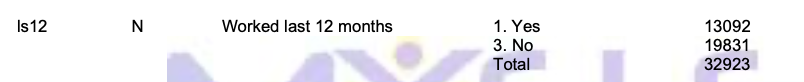
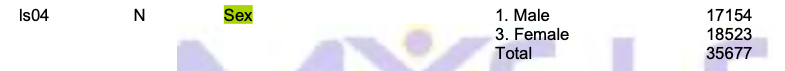

## Q.1.1 What is the labor market participation of men and women aged 16 to 65

### 1.1.1 Filter ages 16-65

In [9]:
df_labor['Worked_dummy'] = df_labor.ls12.map({1:1, 3:0}) #Create worked dummy
mask = (df_labor['ls02_2']>15) & (df_labor['ls02_2']<66)
ages_16to65 = df_labor.loc[mask]

In [11]:
ages_16to65.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20852 entries, 0 to 35676
Columns: 25 entries, folio to Worked_dummy
dtypes: float32(24), float64(1)
memory usage: 2.2 MB


### 1.1.2 Filter men and women

In [12]:
ages_16to65['gender'] = ages_16to65.ls04.map({1:"Male", 3:"Female"})

/usr/local/lib/python3.6/dist-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


### 1.1.3 ANSWER

In [13]:
ans1_overall = ages_16to65.Worked_dummy.mean()
ans1_male = ages_16to65.loc[ages_16to65.gender=='Male'].Worked_dummy.mean()
ans1_female = ages_16to65.loc[ages_16to65.gender=='Female'].Worked_dummy.mean()
print("Overall--labor market participation: {:.2%}".format(ans1_overall))
print("Male--labor market participation: {:.2%}".format(ans1_male))
print("Female--labor market participation: {:.2%}".format(ans1_female))

Overall--labor market participation: 58.69%
Male--labor market participation: 83.87%
Female--labor market participation: 36.23%


## Q1.2 Provide labor market participation rates by 5 year age ranges for men and women.

### 1.2.1 We cannot use simple groupby function to pull age range

In [14]:
ages_16to65.groupby("ls02_2")['Worked_dummy'].mean().head(3)

ls02_2
16.0    0.215364
17.0    0.312263
18.0    0.402597
Name: Worked_dummy, dtype: float64

### 1.2.2 Use pd.cut
- First sort age values 
    - Create age cut off values
    - ages_16to65["ls02_2"].sort_values().values
    - Use pd.cut()

#### 1.2.2.1 Create age cut offs

In [15]:
age_cutoffs= [x for x in range(15,66) if x%5==0]
age_cutoffs

[15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65]

#### 1.2.2.2 Create age groups

In [16]:
age_group = pd.cut(ages_16to65["ls02_2"].sort_values().values, age_cutoffs)

#### 1.2.2.3 Groupby mean of worked dummy

In [17]:
ans1_2 = ages_16to65.groupby(age_group)["Worked_dummy"].mean().to_frame()
ans1_2.index.names= ['Age group']
ans1_2.Worked_dummy = ans1_2.Worked_dummy.map(lambda n: '{:.2%}'.format(n))

### 1.2.3 Answer

In [18]:
ans1_2

,Worked_dummy
Age group,
"(15, 20]",55.15%
"(20, 25]",60.12%
"(25, 30]",60.78%
"(30, 35]",57.29%
"(35, 40]",61.91%
"(40, 45]",60.18%
"(45, 50]",60.48%
"(50, 55]",57.26%
"(55, 60]",56.01%


# Q.2. Construct at least two different definitions of the informal sector to answer the following questions.

- 2.1 What proportion of men and women who work are in the informal sector?
- 2.2 What are the average hours worked of men and women in the informal sector versus the formal sector?
- 2.3 Compare total earnings, average earnings per hour and median earnings per hour in the formal and informal sector for men and women.
- 2.4 TB24 asks broadly about occupation using this question repeat c) above. 

## 2.1 What proportion of men and women who work are in the informal sector?

- 11 Profesionist 304 
- 12 Technicians 230 
- 13 Education workers 370 
- 14 Arts, performance 63 
- 21 Employees and 87 directors of the public, private and social sectors
- 41 Agricultural, cattle 2097 activities, foresting, hunting and fishing workers
- 51 Chiefs, supervisors 74 
- 52 Manufacturing 1877 craftsmen and workers
- 53 Operators of fixed 251 machinery of continuous movement and equipment in the process of industrial production
- 54 Assistants, laborers and similar in the process of artisan and industrial manufacture and in activities of repair and maintenance 608 
- 55 Conductors and assistants of conductors of movable machinery and means of transport 394 
- 61 Department chiefs, coordinators and supervisors of the administrative activities and services. 161 
- 62 Workers in the support of the administrative activities  735 
- 71 Retailers, employees in commerce and sales agents 1,726 
- 72 Street sales and services workers233 
- 81 Workers in personal establishments 762 
- 82 Workers in domestic services 444 
- 83 Workers in services of protection, monitoring and armed forces 248
- 99 Other workers with 29 occupations noncclassified previously, insufficiently specified and not specified

### 2.1.1 Merge df_income and ages_16to65

In [25]:
ages_16to65_small = ages_16to65[['folio', 'ls', 'gender', 'Worked_dummy']]
df_income_small = df_income[['folio', 'ls', 'tb24_26p_cmo','tb44p_2', 'tb35a_2']]
merged = pd.concat([ages_16to65_small, df_income_small], axis=1, join='inner', keys=['ls',"folio"])
merged.columns = merged.columns.droplevel(0)
merged.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11390 entries, 0 to 19754
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   folio         11390 non-null  float32
 1   ls            11390 non-null  float32
 2   gender        11390 non-null  object 
 3   Worked_dummy  11384 non-null  float64
 4   folio         11390 non-null  float64
 5   ls            11390 non-null  float32
 6   tb24_26p_cmo  6216 non-null   float64
 7   tb44p_2       5363 non-null   float32
 8   tb35a_2       1858 non-null   float64
dtypes: float32(4), float64(4), object(1)
memory usage: 711.9+ KB


In [26]:
merged = pd.merge(ages_16to65_small, df_income_small, how='inner', on=['ls',"folio"]) # Not including 'on='branch_id' will reset index
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17382 entries, 0 to 17381
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   folio         17382 non-null  float32
 1   ls            17382 non-null  float32
 2   gender        17382 non-null  object 
 3   Worked_dummy  17382 non-null  float64
 4   tb24_26p_cmo  10039 non-null  float64
 5   tb44p_2       8703 non-null   float32
 6   tb35a_2       3084 non-null   float64
dtypes: float32(3), float64(3), object(1)
memory usage: 882.7+ KB


#### 2.1.1.1 Create informal dummy

In [27]:
mask = (merged["tb24_26p_cmo"]==41) | (merged["tb24_26p_cmo"]==72) | (merged["tb24_26p_cmo"]==81) | (merged["tb24_26p_cmo"]==82)
merged['informal_dummy'] = pd.get_dummies(mask, drop_first=True)

### 2.1.2 ANSWER

In [28]:
merged["male_dummy"] = merged.gender.map({"Male":1, "Female":0})
mask = (merged["tb24_26p_cmo"]==41) | (merged["tb24_26p_cmo"]==72) | (merged["tb24_26p_cmo"]==81) | (merged["tb24_26p_cmo"]==82)
informal = merged.loc[mask]
formal = merged.loc[-mask]
formal_mean = informal.Worked_dummy.mean()
informal_mean  = formal.Worked_dummy.mean()
print("Formal sector labor market participation: {:.2%}".format(formal_mean))
print("Informal sector labor market participation: {:.2%}".format(informal_mean))
formal_pct = len(formal)/(len(formal)+len(informal))
informal_pct = len(informal)/(len(formal)+len(informal))
print("Formal worker percent of labor force {:.2%} \nInformal worker percent of labor force {:.2%}".format(formal_pct ,informal_pct))

Formal sector labor market participation: 88.06%
Informal sector labor market participation: 49.67%
Formal worker percent of labor force 81.59% 
Informal worker percent of labor force 18.41%


### 2.1.2 Answer: Cleaner

In [37]:
merged["male_dummy"] = merged.gender.map({"Male":1, "Female":0})
#merged.loc[mask, ["tb24_26p_cmo",'informal_dummy']]
round(merged.dropna().groupby("male_dummy")['informal_dummy'].mean().to_frame()*100,2)

,informal_dummy
male_dummy,
0,31.46
1,30.95


## 2.2 What are the average hours worked of men and women in the informal sector versus the formal sector?


### 2.2.1 Show histogram

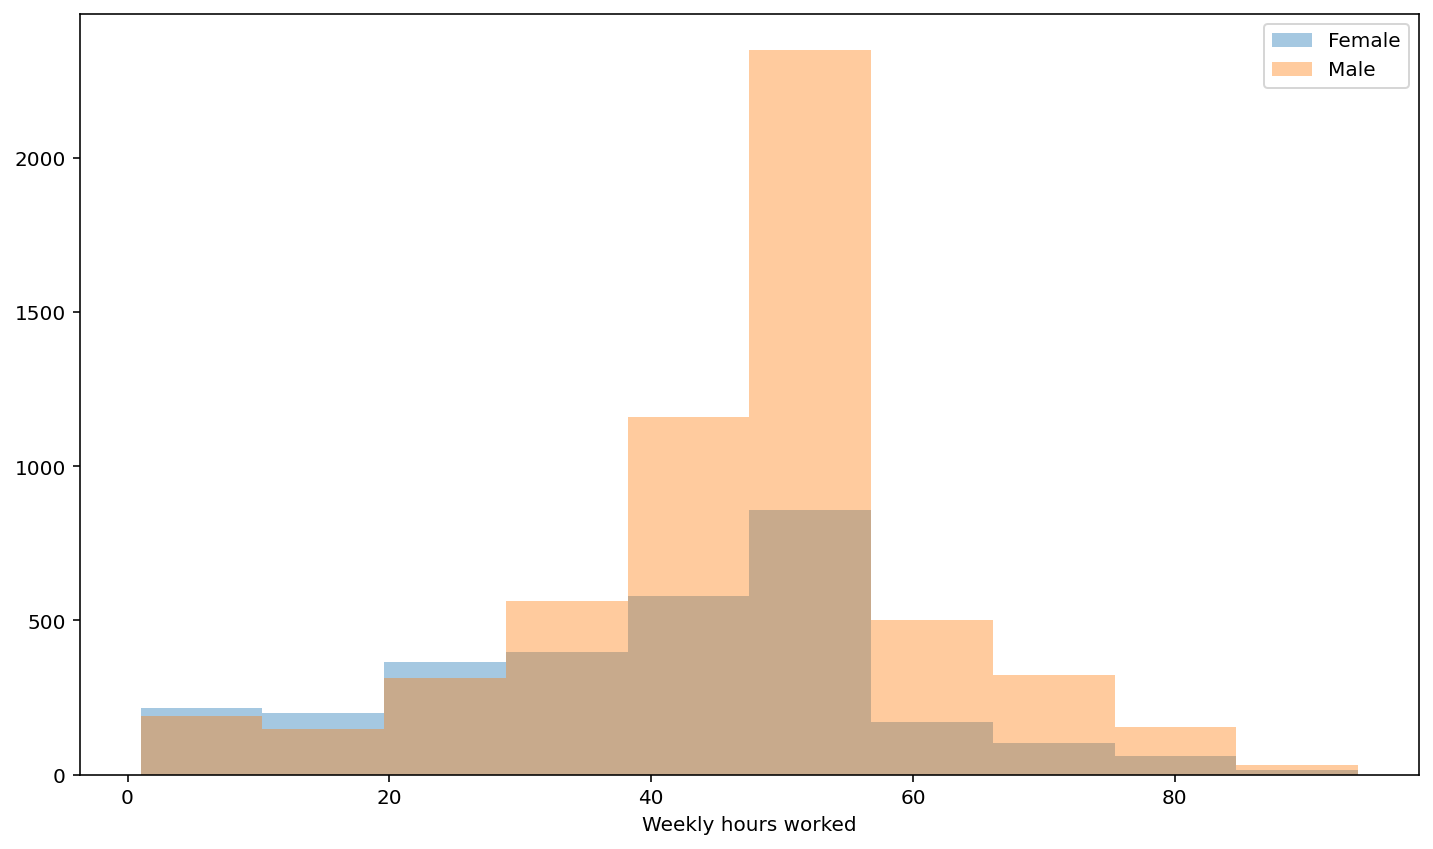

In [31]:
ax = sns.distplot(merged.loc[merged.gender=="Female", "tb44p_2"], hist=True, kde=False, bins=10, label="Female")
ax = sns.distplot(merged.loc[merged.gender=="Male", "tb44p_2"], hist=True, kde=False, bins=10, label="Male")
ax.set_xlabel('Weekly hours worked')
plt.legend();

### 2.2.2 Answer

In [32]:
hours_week_work = "tb44p_2"
for i in ["Male", "Female"]:
    informal_means = informal.loc[informal['gender']==i].tb44p_2.mean()
    formal_means = formal.loc[formal['gender']==i].tb44p_2.mean()
    print("Informal "+str(i)+" hours worked {:.2f}".format(informal_means))
    print("Formal "+str(i)+" hours worked {:.2f}".format(formal_means))
    print("")

Informal Male hours worked 44.69
Formal Male hours worked 46.29

Informal Female hours worked 38.50
Formal Female hours worked 39.75



### 2.2.2 Answer: Cleaner version

In [38]:
merged.dropna().groupby(["male_dummy", "informal_dummy"])['tb44p_2'].mean()

male_dummy  informal_dummy
0           0                 40.369263
            1                 39.391304
1           0                 45.952950
            1                 44.666031
Name: tb44p_2, dtype: float32

## 2.3 Compare in the formal and informal sector for men and women for: 
1. total earnings 
2. average earnings per hour 
3. median earnings per hour 

### 2.3.1 Calculate "month hours" and "hourly wage"

In [39]:
monthly_earnings = "tb35a_2"
merged["Monthly_hours"] = merged.tb44p_2*4.3
merged['Hourly_wage'] = merged[monthly_earnings]/merged.Monthly_hours
mask = (merged["tb24_26p_cmo"]==41) | (merged["tb24_26p_cmo"]==72) | (merged["tb24_26p_cmo"]==81) | (merged["tb24_26p_cmo"]==82)
informal = merged.loc[mask]
formal = merged.loc[-mask]

### 2.3.2 Answer:

In [40]:
hours_week_work = "tb44p_2"
for i in ["Male", "Female"]:
    informal_means = informal.loc[informal['gender']==i].Hourly_wage.mean()
    formal_means = formal.loc[formal['gender']==i].Hourly_wage.mean()
    print("Informal "+str(i)+" avg. hourly wage {:.2f}".format(informal_means))
    print("Formal "+str(i)+" avg. hourly wage {:.2f}".format(formal_means))
    print("")

Informal Male avg. hourly wage 12.51
Formal Male avg. hourly wage 26.85

Informal Female avg. hourly wage 12.42
Formal Female avg. hourly wage 31.79



### 2.3.3 Answer: Cleaner version

#### 2.3.3.1 Total earnings

In [41]:
merged.dropna().groupby(["male_dummy", "informal_dummy"])[monthly_earnings].mean()

male_dummy  informal_dummy
0           0                 4175.794411
            1                 1745.882609
1           0                 4303.087254
            1                 2144.250000
Name: tb35a_2, dtype: float64

#### 2.3.3.2 Avg. & Median earnings per hour

In [42]:
merged.dropna().groupby(["male_dummy", "informal_dummy"])['Hourly_wage'].agg(["mean", 'median'])

mean     median
male_dummy informal_dummy                      
0          0               31.943008  17.441860
           1               12.423699   9.302326
1          0               26.927515  15.980066
           1               12.509076   9.152764

## 2.5 Are there occupations where earnings in the informal sector are close to or higher than the formal sector?

In [43]:
ans_25 = merged.groupby("tb24_26p_cmo")["Hourly_wage"].mean().to_frame()
ans_25.index.name="Occupation type"
ans_25

,Hourly_wage
Occupation type,
11.0,51.730093
12.0,47.026180
13.0,51.023828
14.0,40.598485
21.0,65.694016
41.0,10.649240
51.0,24.958455
52.0,20.409994
53.0,14.608254
